In [162]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [163]:
weight = np.random.randint(180, 255, size=(100))
height = np.random.randint(58, 80, size=(100))
X = np.column_stack((weight, height))

In [164]:
# Create 4 centroids located at random locations in the plot
centroid_f1 = np.random.randint(180, 255, size=(4))
centroid_f2 = np.random.randint(58, 80, size=(4))
centroids = np.column_stack((centroid_f1, centroid_f2))


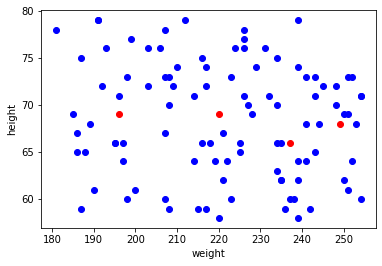

In [171]:
# Show the random positions of the 4 centroids
fig, ax = plt.subplots()
ax.scatter(centroids[:,0], centroids[:,1], c='red')

# Show random height and weight distribution
ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.scatter(X[:,0], X[:,1], c='blue')

plt.show()

In [166]:
def assign_points(X, centroids):
  # Assign points to their closest centroid

  m = len(X)
  labels = np.zeros(m) # Denotes closest centroid

  for i in range(m): # For every training example..
    c_i = 0
    min_distance = math.inf
    for k in range(len(centroids)): # Compare it with every centroid 
      dist = abs(X[i] - centroids[k])**2
      dist = np.sum(dist)
      if dist < min_distance:
        min_distance = dist # Update the min distance
        c_i = k  # Update to make this centroid the closest to this example
    labels[i] = c_i   # Assign this centroid to this example

  return labels

In [167]:
# For all the points in a cluster, find their mean and move the centroid to that location
def move_clusters(X, centroids, labels):
  m, n = len(X), len(X[0])

  for k in range(len(centroids)): # For each centroid
    new_centroid_location = np.zeros(n)
    sum = np.zeros(n)
    count = 0
    for i in range(m): # For each example
      c_i = labels[i] # Centroid assigned to this example
      if c_i == k: # If this example is grouped to this centroid
        count += 1
        for j in range(n): # For each feature in the example
          sum[j] += X[i][j]
    new_centroid_location = sum / count
    centroids[k] = new_centroid_location
  return centroids

In [172]:
def KMeans(X, centroids, epochs):
  for i in range(epochs):
    labels = assign_points(X, centroids)
    centroids = move_clusters(X, centroids, labels)
  return centroids, labels

centroids, labels = KMeans(X, centroids, epochs=10)

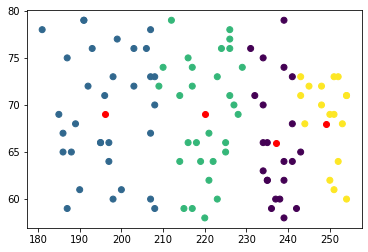

In [173]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=labels)
ax.scatter(centroids[:,0], centroids[:,1], c='red')
plt.show()